# Practical Algorithms I - Euler Method

We've covered algorithms in the abstract sense previously. Now we will look at a concrete, basic one that can be used for physical problems. We will look at the Euler method. It works as follows:

For the situation 
$$ y' = f(t,y(t)) $$ 
and 
$$ y(t_0) = y_0$$ we will let 
$$ y(t_0 + \Delta t) = y(t_0) + f(t_0, y(t_0)) \Delta t $$
for some small $ \Delta t $. We will apply it in the context of acceleration and velocity, where the algorithm will be as follows:
$$ v(t_0) = v_0$$ we will let 
$$ v(t_0 + \Delta t) = v(t_0) + a(t_0, v(t_0)) \Delta t $$

We will apply this method to the situation of a rocket, as described in the lectures. To do this, first we will import the neccesary modules:

In [3]:
import copy
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

We will then define functions which step the time forwards, implementing the Euler method, and a method to calculate the analytic solution to the velocity at a certain mass, as defined in lectures:
(Keep in mind global variables are generally bad practice. They are used here because it allows for short code and the functions are highly specific to this rocket problem, meaning it's highly unlikely they'll be reused, making it not so much of a problem)

In [7]:
def step_time():
    global m_change_rate, delta_t, m_rocket, v_ejecta, v_rocket
    m_change = m_change_rate * delta_t
    m_rocket += m_change
    force = - m_change_rate * v_ejecta
    accel = force/m_rocket
    v_rocket += accel*delta_t

def analytic_soln():
    global m_change_rate, delta_t, m_rocket, v_ejecta, v_rocket
    return v_ejecta * log(initial_m_rocket / m_rocket)

We will then run the simulation for max_t time using a while loop. The results are appended to the arrays t, v, and m for plotting at a later time. The code should be self explanatory as variable names are as described in lectures. Read the code and make sure you understand it.

In [10]:
m_change_rate = -0.1
v_ejecta = 5.
delta_t = 5.
m_rocket = 10.
initial_m_rocket = copy.copy(m_rocket)
v_rocket = 0.
t = []
v = []
m = []
analytic = []
current_t = 0.
max_t = 95.

while current_t < max_t:
    step_time()
    t.append(current_t)
    v.append(v_rocket)
    m.append(m_rocket)
    analytic.append(analytic_soln())
    current_t += delta_t

We will then plot the results in publication-quality figures. Try playing with delta_t in the cell above and see how it affects how well the Euler method approximates the real function.

<IPython.core.display.Javascript object>


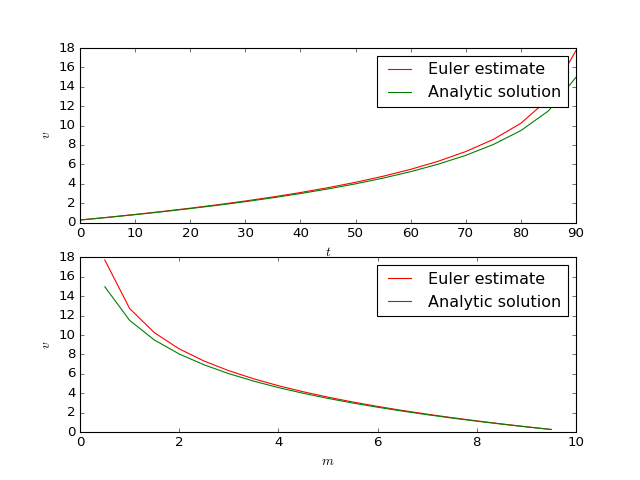

In [11]:
fig = plt.figure()

ax = plt.subplot(211);
ax1 = plt.subplot(212);

# Label the axes
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$v$')

ax1.set_xlabel(r'$m$')
ax1.set_ylabel(r'$v$')

ax.plot(t, v, label='Euler estimate', color='r')
ax.plot(t, analytic, label='Analytic solution', color='g')
ax.legend()

ax1.plot(m, v, label='Euler estimate', color='r')
ax1.plot(m, analytic, label='Analytic solution', color='g')
ax1.legend()

Now try using these results to model the displacement of the rocket, both by integrating the analytic equation and by using the Euler method. If you're keen, try adding the effects of gravity to the Euler method for a more realistic model of a rocket lifting off.